                                         T.A. Maryam Azhin

**Multiple reactions in an ideal isothermal reactor. Reactor descriptors**

**Q1. Multiple reactions.**
The following gas-phase reactions were carried out in an isothermal PFR without pressure drop:

Rxn1). $3A \rightarrow B+C;\;\;\;$ $-r_{1A} = k_{1A}C_{A};\;\; k_{1A} = 7 min^{-1}$

Rxn2). $2C+A \rightarrow 3D;\;\;\;$ $r_{2D} = k_{2D}C_{A}^2C_{C}$; $k_{2D} = 10000 dm^6 mol^{-2} min^{-1}$

Rxn3). $4D+3C \rightarrow 3E;\;\;$ $r_{3E} = k_{3E}C_DC_C$; $k_{3E} = 8000 dm^3 mol^{-1} min^{-1}$

The total concentration of pure $A$ entering the reactor is $0.2 mol/dm^3$, and entering volumetric flow rate is
$10 dm^3/min$.
Find reactor volume to achieve maximum yield of $D$.
Find STY and integral reactor selectivity at the point of maximum $D$ yield.
A similar problem and its solution can be found in the online resources accompanying the book by Fogler:
http://umich.edu/~elements/06chap/frames.htm (go to “Learning Resources” $\rightarrow$ “Summary Notes” $\rightarrow$
scroll down to Example C: gas phase PFR, no pressure drop).

**Answer:**

**Mole Balance** for each species in the PFR:
$$\frac{dF_A}{dV}=r_A; \;\; \frac{dF_B}{dV}=r_B;\;\;\frac{dF_C}{dV}=r_C;\;\;\frac{dF_D}{dV}=r_D;\;\;\frac{dF_E}{dV}=r_E$$

**B.C.:**
At $V_0=0$, all $F_{i0}=0$ 
   except for $F_{A0}=C_{A0}Q_0=0.2*10=2 mol/min$
   
**Rate Laws:**

$$r_j=\sum r_{ij}$$ Where $j$ is the species and $i$ is the reaction number.

$$r_A=r_{1A}+r_{2A}; \;\;\;\; r_B=r_{1B}; \;\;\;\;r_c=r_{1c}+r_{2c}+r_{3c}; \;\;\;\;r_D=r_{2D}+r_{3D}; \;\;\;\;r_E=r_{3E}$$

$$-r_{1A} = -k_{1A}C_{A};\;\;\;\;\; k_{1A} = 7 min^{-1}$$

$$r_{2D} = k_{2D}C_{A}^2C_{C};\;\;\;\;\; k_{2D} = 10000 dm^6 mol^{-2} min^{-1}$$

$$r_{3E} = k_{3E}C_DC_C;\;\;\;\;\; k_{3E} = 8000 dm^3 mol^{-1} min^{-1}$$

**Reaction rate connections.**

Rxn1).$$\frac{r_{1A}}{-3}=\frac{r_{1B}}{+1}=\frac{r_{1C}}{+1}$$
$$r_{1B}=\frac{-r_{1A}}{3}$$
$$r_{1C}=\frac{-r_{1A}}{3}$$

Rxn2). $$\frac{r_{2C}}{-2}=\frac{r_{2A}}{-1}=\frac{r_{2D}}{+3}$$
$$r_{2A}=-1/3r_{2D}$$
$$r_{2C}=-2/3r_{2D}$$

Rxn3). $$\frac{r_{3D}}{-4}=\frac{r_{3C}}{-3}=\frac{r_{3E}}{+3}$$
$$r_{3C}=-r_{3E}$$
$$r_{3D}=-4/3r_{3E}$$

**Stoichiometry**
Constant T and P

$$C_A=C_{T0}\frac{F_A}{F_T};\;\;\;\;C_C=C_{T0}\frac{F_C}{F_T};\;\;\;\; C_D=C_{T0}\frac{F_D}{F_T}$$
$$C_{T0}=0.2 mol/dm^3$$
$$F_T=F_A+F_B+F_C+F_D+F_E$$


$$\frac{dF_A}{dV}=r_{1A}+r_{2A}=-k_{1A}C_{A}-1/3(k_{2D}C_{A}^2C_{C})=-7C_{A}-(10000C_{A}^2C_{C})/3$$

$$\frac{dF_B}{dV}=r_{1B}=k_{1A}C_{A}/3$$

$$\frac{dF_C}{dV}=r_{1c}+r_{2c}+r_{3c}=1/3k_{1A}C_{A}-2k_{2D}C_{A}^2C_{C}/3-k_{3E}C_DC_C=7C_{A}/3-20000C_{A}^2C_{C}/3-8000C_DC_C$$

$$\frac{dF_D}{dV}=r_{2D}+r_{3D}=k_{2D}C_{A}^2C_{C}+k_{3E}C_DC_C=10000C_{A}^2C_{C}+8000C_DC_C$$

$$\frac{dF_E}{dV}=r_{3E}=k_{3E}C_DC_C=8000C_DC_C$$


Applying any ODE solver
at $V=0.664 L$, $F_{Dmax}=0.146 \frac{mol}{min}$

$$STY=\frac{mol_D}{time. V_{reactor}}=\frac{0.146}{0.664}=0.22 \frac{mol}{min.L}=13 \frac{kmol_D}{m^3.h}$$

$$S_D=\frac{F_D}{F_D+F_B+F_C+F_E}=\frac{0.146}{0.146+0.26+0.01+0.08}=29\%$$

All products are at the same reactor point $= 0.664$

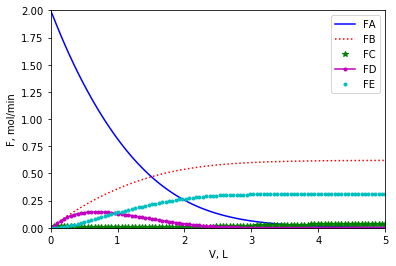

In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

CA0=0.2    
Q0=10.     
FA0=CA0*Q0 # mol/min
                                                 
V=np.linspace(0.,5.,100)
FA=np.zeros(len(V))
FB=np.zeros(len(V))
FC=np.zeros(len(V))
FD=np.zeros(len(V))
FE=np.zeros(len(V))

F=[FA,FB,FC,FD,FE]

def fun(F,V):
       k1=7.
       k2=10000.
       k3=8000.
       CT0=0.2 #mol/dm^3
       FT=F[0]+F[1]+F[2]+F[3]+F[4]
       Ca=CT0*F[0]/FT
       Cc=CT0*F[2]/FT
       Cd=CT0*F[3]/FT
       dFdV= [-k1*Ca-k2*pow(Ca,2)*Cc/3., k1*Ca/3., k1*Ca/3.-2.*k2*pow(Ca,2)*Cc/3.-k3*Cd*Cc, k2*pow(Ca,2)*Cc-4.*k3*Cd*Cc/3., k3*Cd*Cc]
       return dFdV
    
       #dFAdV=-k1*CA-k2*CA^2*CC/3                #r1A+r2A
       #dFBdV=k1*CA/3                            #r1B
       #dFCdV=k1*CA/3-2*k2*CA^2*CC/3-k3*CD*CC    #r1C+r2C+r3C
       #dFDdV=k2*CA^2CC-4*k3*CD*CC/3             #r2D+r3D
       #dFEdV=k3*CD*CC                           #r3E

init_F= [FA0,0,0,0,0]
FS=odeint(fun,init_F,V)

plt.plot(V, FS[:,0], 'b-', label='FA')
plt.plot(V, FS[:,1], 'r:', label='FB')
plt.plot(V, FS[:,2], 'g*', label='FC')
plt.plot(V, FS[:,3], 'm.-', label='FD')
plt.plot(V, FS[:,4], 'c.', label='FE')

plt.xlabel('V, L')
plt.ylabel('F, mol/min')
plt.legend(loc="upper right")
plt.ylim(0, 2.0)
plt.xlim(0, 5.0)
plt.show()


In [3]:
print(max(FS[:,3]))
result=np.where(FS[:,3] == np.amax(FS[:,3]))
print(result[0])
print(V[result[0]])

0.14593829696802288
[13]
[0.65656566]


In [4]:
STY=max(FS[:,3])/V[result[0]] #\frac{kmol_D}{m^3.h}$
S_D=100.*FS[result[0],3]/(FS[result[0],1]+FS[result[0],2]+FS[result[0],3]+FS[result[0],4])
print("STY=", STY*100)
print("S_D=", S_D)
#All products are at the same reactor point $= 0.664$

STY= [22.22752523]
S_D= [29.57249593]


---------------------------------------------------------------------------------------

**Q2. Some PBR descriptors: WHSV, LHSV and GHSV.**

Hydrodesulfurization (HDS) of dibenzothiophene (DBT) was performed over a Co-Mo/Al2O3 catalyst
$(0.09 g)$ at $5.0 MPa$ and $300 ^oC$. 

$0.5 wt\%$ DBT solution in n-decane was fed by a pump at $0.05 cc/min$.
Liquid decane density is $0.73 g/cc$. Hydrogen was fed at $10 sccm$ (standard cubic centimeters per minute).
The liquid feed is completely vaporized under the reaction conditions. The catalyst (alumina) density is $4
g/cm^3$, the bed porosity is $0.2$. Internal cross-sectional area of the reactor tube is $0.8 cm^2$. Assume ideal
gas.

a). Calculate 	Weight Hourly Space Velocity (WHSV).

b). Find Liquid Hourly Space Velocity(LHSV) and Gas Hourly Space Velocity(GHSV).

c). Find superficial and interstitial (true) linear velocity of hydrogen at the bed entrance


![PFR.png](S4Q2.png)

Liquid: $0.5 wt\%$ DBT in decane. 

Assume density = density of decane

**a)**. 

WHSV=LWHSV+GWHSV

$LWHSV=\frac{\dot{m}(DBT+Decane)}{W_{cat}}=\frac{0.05 [cc Liq. feed.min^{-1}]*0.73 [g/cc]*60}{0.09 [g]}=24.33 [h^{-1}]$

Gas flow rate: $PQ=FRT$


Q=100 cm^3.min^{-1} at Standard Temperature & Pressure (STP)

$\dot{m}_{h_2}=\frac{100 cm^3.min^{-1}*10^5 Pa*60 min.h^{-1}}{8.314 [m^3⋅Pa⋅K^{−1}⋅mol^{−1}] *10^6 [cm^3.m^{-3}] *273.15 K}*2g.mol^{-1} [MW of H2]=0.53 g/h$

$WHSV=\frac{2.19 [L]+0.53 [G]}{0.09 [gCat]}=30.2 h^{-1}$

**b)**.

$V_{bed}=\frac{m_{bed}}{\rho_{bed}}=\frac{m_{cat}}{\rho_{cat}(1-\Phi_{bed})}= \frac{0.09 g}{4(1-0.2)}= 0.028$

$LHSV=\frac{Q_{l0}(STP)}{V_{cat.bed}}=\frac{0.05 [cc.min^{-1}]*60}{0.028}=107 [h^{-1}]$ Feed from pump


$GHSV (H_2)=\frac{Q_{0}(STP)}{V_{cat.bed}}=\frac{100 sccm* 60}{0.028}=214285.7 h^{-1}$

**c)**.

$u_s=\frac{Q_0(rxn)}{A_c}$

$Q_0(rxn)=Q_0(STP)*\frac{T(rxn)}{T(STP)}*\frac{P(STP)}{P(rxn)}=100(sccm)*60 (min/h)*\frac{573K}{273.15}\frac{0.1 MPa}{5 MPa}=252 \frac{cm^3}{h}$

$u_s=\frac{252}{0.8}=314 \frac{cm}{h}$

True (interstitial velocity):
$u_i=\frac{u_s}{\Phi_{bed}}=\frac{315}{0.2}=1573 \frac{cm}{h}$

In [5]:
Ql0=0.05 #DBT+Decane cc Liq. feed.min^{-1}
Pstp = 0.1  #MPa
Tstp = 273.15 #K
Prxn = 5.0 #𝑀𝑃𝑎
Trxn = 573.15 #K
rol = 0.73 #Liquid decane density, 𝑔/𝑐𝑐
w_cat = 0.09 # catalyst weight
rho_cat = 4. # catalyst (alumina) density, 𝑔/𝑐𝑚^3
phi_bed =0.2
R = 8.314 #[m^3⋅Pa⋅K^{−1}⋅mol^{−1}] 
MW_H2 = 2 #g.mol^{-1}, [MW of H2]
Qg0 = 100 #Vol. flow rate of Hydrogen was fed  (standard cubic centimeters per minute, sccm)
Ac = 0.8  #Internal cross-sectional area of the reactor tube is, cm^2
    
LWHSV = Ql0*rol*60/w_cat #h^{-1}
GWHSV =((Qg0*1000000*Pstp*60)*MW_H2/(R*1000000*Tstp))/w_cat #=0.53 g/h$
WHSV=LWHSV+GWHSV

In [6]:
WHSV

30.204541943495986

In [7]:
rho_bed=rho_cat*(1-phi_bed)
V_bed=w_cat/rho_bed

LHSV=Ql0*60/V_bed # Feed from pump, h^{-1}
GHSV=Qg0*60/V_bed #h^{-1}

In [8]:
GHSV

213333.33333333334

In [9]:
Qg0rxn=Qg0*60*(Trxn/Tstp)*(Pstp/Prxn)  # cm^3/h
us=Qg0rxn/Ac
ui=us/phi_bed  #True (interstitial velocity)

In [10]:
us

314.74464579901155